In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(suppress=True)
import pandas as pd
from numpy import linalg as LA
from scipy import linalg
from numpy.testing import assert_allclose
from sympy import var, plot_implicit
var('x y');

## Номер 1

In [3]:
n = 1000
a = np.random.normal (0, 1, (n, n))
A = a + a.T

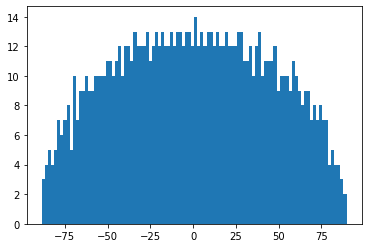

In [4]:
plot = plt.hist(np.linalg.eigvalsh(A), bins=100)
plt.show()

## Номер 2

In [5]:
n = 10
a = np.random.normal(0, 1, (n, n))
A = a @ a.T

In [6]:
spctr = np.linalg.eigvalsh(A)
print(spctr)

[ 0.00334659  0.16982645  0.55631361  2.86142663  5.5018327   6.24259
  9.18528325 20.62942715 28.1302791  29.47940524]


In [7]:
H = linalg.hessenberg(A)
for i in range(50):
    print(H)
    Q, R = np.linalg.qr(H)
    H = R @ Q
for j in range (9,-1,-1):
    print(H[j][j])

[[ 7.11274766 -8.93977615  0.         -0.          0.          0.
  -0.         -0.         -0.          0.        ]
 [-8.93977615 18.35438382  6.55311339 -0.          0.          0.
  -0.         -0.          0.          0.        ]
 [ 0.          6.55311339 13.90601466 -9.59808253 -0.         -0.
   0.         -0.          0.         -0.        ]
 [ 0.          0.         -9.59808253 15.71153932 -1.22413116 -0.
  -0.          0.         -0.         -0.        ]
 [ 0.          0.          0.         -1.22413116 17.54089203 13.05561959
   0.          0.         -0.         -0.        ]
 [ 0.          0.          0.          0.         13.05561959 14.20974855
   3.82640928 -0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          3.82640928
   4.09455583 -1.08689712  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -1.08689712  7.65158522  2.50055562  0.        ]
 [ 0.          0.          0.          0

In [170]:
i=0
H = linalg.hessenberg(A)
while abs(spctr[0] - H[-1][-1])/spctr[0] >= 0.01:
    Q, R = np.linalg.qr(H)
    H = R @ Q
    i=i+1
print(i)
print(H[-1][-1])
print(spctr[0])

3
0.03243313742576478
0.03243206090223329


## Номер 3

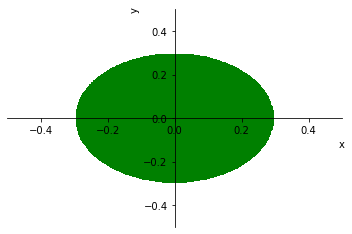

In [123]:
plot_implicit((1/(x**2 + y**2) + 1/2*(1/(x**2 + y**2))**2 + 1/2*(1/(x**2+y**2)*(1/(x**2 + y**2) + 4)**(1/2)))**(1/2) >= 10, (x, -0.5, 0.5), (y, -0.5, 0.5), adaptive=False, line_color='green')

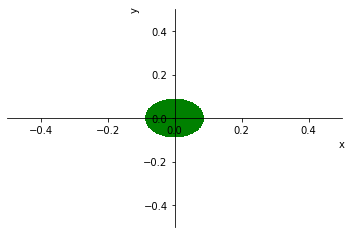

In [124]:
plot_implicit((1/(x**2 + y**2) + 1/2*(1/(x**2 + y**2))**2 + 1/2*(1/(x**2+y**2)*(1/(x**2 + y**2) + 4)**(1/2)))**(1/2) >= 100, (x, -.5, .5), (y, -.5, .5), adaptive=False, line_color='green')

## Номер 4

In [164]:
def power_iter(d, u, vec, eps=1e-5, maxiter=10000):
    
    y = d * vec + u * np.inner(u, vec)
    x = y / np.linalg.norm(y)
    prev_lam = np.inner(vec, d * vec + u * np.inner(u,vec))
    
    for k in range(1, int(maxiter)):
        y = d * x + u * np.inner(u,x)
        x = y / np.linalg.norm(y)
        lam = np.inner(x, d * x + u * np.inner(u,x))
        
        if abs(lam - prev_lam) < eps:
            return lam, x, k + 1
        
        prev_lam = lam
    return prev_lam, x, maxiter

In [239]:
def min_eig(n):
    
    D = np.random.normal(0, 1, n)
    u = np.random.normal(0, 1, n)
    u = u/np.linalg.norm(u)
    
    D_max = D.max()
    if D_max + 1 > 0:
        D_new = D - np.array([D_max + 1 + 1e-3])
        temp = D_max + 1 + 1e-3
    else:
        D_new = D
        temp = 0
        
    v = np.random.normal(0, 1, n)
    lam, x, k = power_iter(D_new, u, v)
    
    print("Минимальное собственное значение посчитанное нашим способом:",lam + temp,"\n")
    if (n <= 10**2):
        wa, va = LA.eigh(np.diag(D) + np.outer(u,u))
        print("Минимальное собственное значение посчитанное библиотченой функцией: ",wa.min(),"\n")
        print("Минимальное собственное значение посчитанное библиотченой функцией:\n",va[:,wa.argmin()],"\n")
    print("Собственный вектор минимального собственного значение посчитанное нашим способом:\n",x)

In [245]:
min_eig(10**2)

Минимальное собственное значение посчитанное нашим способом: -2.1641704228009875 

Минимальное собственное значение посчитанное библиотченой функцией:  -2.164235064219562 

Минимальное собственное значение посчитанное библиотченой функцией:
 [-0.00038821  0.00070659 -0.00040055 -0.00053494  0.00075289 -0.00226797
  0.00113815  0.00272463 -0.00383642  0.00123612  0.00113647 -0.00172033
  0.00106028  0.00126108 -0.00037386 -0.00099836  0.0025119  -0.00046376
  0.00064807 -0.00102459  0.00091014  0.00043318  0.00095373 -0.00192594
 -0.0023021   0.00104032 -0.00047958 -0.00015111  0.00215634  0.00264934
 -0.00171416 -0.00024625  0.00041248  0.00106497  0.00201801 -0.0016875
 -0.00194957 -0.00079796  0.00158416  0.0002014   0.0001839   0.0005088
 -0.00051329 -0.00977206 -0.00130391 -0.00097745 -0.0010553  -0.00370768
  0.00234515 -0.00120566 -0.0005718  -0.00384815 -0.00026225  0.00365037
 -0.00092983 -0.00013129  0.00076404 -0.00090352  0.00044132  0.00161351
 -0.00002911  0.00068292  0.00

In [234]:
min_eig(10**5)

Минимальное собственное значение посчитанное нашим способом: -4.619580208562951
Собственный вектор минимального собственного значение посчитанное нашим способом:
 [-0.00000184 -0.00000121 -0.0000004  ... -0.00000086 -0.00000063
  0.00000369]


## Номер 5

In [282]:
def ConstructMatrixA(N, Mdivm):
    
    matrix = np.zeros((N, N))
    temp = 1/Mdivm
    
    matrix[0][0] = 2 + temp
    matrix[0][1] = 0
    for i in range(2, N):
        if i % 2 == 0:
            matrix[0][i] = temp
        else:
            matrix[i][i] = 1
    
    
    matrix[N - 1][N - 1] = 2 + temp
    for i in range(0, N - 2):
        if i % 2 == 0:
            matrix[N - 1][i] = temp
        else:
            matrix[N - 1][i] = 1
        
    
    
    for i in range(1, N - 1):
        if i % 2 == 0:
            matrix[i][i-1] = -1
            matrix[i][i] = 2
            matrix[i][i+1] = -1
        if i % 2 == 1:
            matrix[i][i-1] = -temp
            matrix[i][i] = 2 * temp
            matrix[i][i+1] = -temp
            
    return matrix   

In [290]:
print(ConstructMatrixA(8, 2))

[[ 2.5  0.   0.5  0.   0.5  0.   0.5  0. ]
 [-0.5  1.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -1.   2.  -1.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  1.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.   2.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -1.   2.  -1. ]
 [ 0.5  1.   0.5  1.   0.5  1.   0.   2.5]]


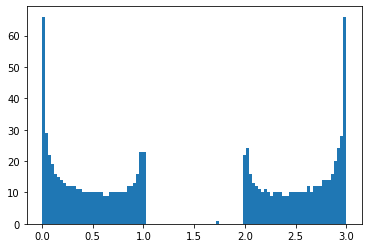

In [291]:
A = ConstructMatrixA(1000, 2)
vals, vects = np.linalg.eig(A)
plot = plt.hist(vals, bins=100)
plt.show()

3.5618820253703274


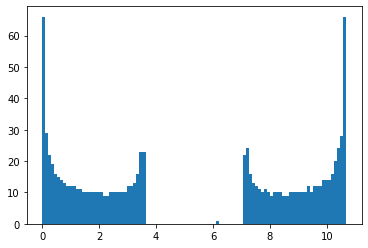

In [294]:
k = np.random.uniform(1, 10)
print(k)
vals, vects = np.linalg.eig(k*A)
plot = plt.hist(vals, bins=100)
plt.show()

In [299]:
np.linalg.eig(A)[1].T

array([[ 0.01679768-0.50270438j,  0.0683735 +0.17367489j,
        -0.22063718-0.18358624j, ..., -0.17749964+0.07682091j,
         0.52120521+0.j        , -0.29715525-0.16301262j],
       [ 0.01679768+0.50270438j,  0.0683735 -0.17367489j,
        -0.22063718+0.18358624j, ..., -0.17749964-0.07682091j,
         0.52120521-0.j        , -0.29715525+0.16301262j],
       [ 0.01696799+0.00158746j, -0.00156393-0.0009409j ,
        -0.01087139+0.00208122j, ..., -0.01491692-0.01264927j,
         0.01515672+0.02903833j,  0.00053497-0.0149182j ],
       ...,
       [ 0.00975315+0.j        , -0.02128797+0.j        ,
        -0.03910597+0.j        , ..., -0.01194114+0.j        ,
         0.01827544+0.j        ,  0.04281607+0.j        ],
       [-0.00971758+0.j        ,  0.01419297+0.j        ,
         0.03277753+0.j        , ..., -0.01709279+0.j        ,
        -0.03462215+0.j        , -0.04565544+0.j        ],
       [-0.00874364+0.j        ,  0.0079691 +0.j        ,
         0.02320121+0.j       